# Preprocessing Workflow

In [1]:
#Investigate the dataset step by step, feature by feature and take preprocessing decisions

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
!pip install fsspec

  Using cached fsspec-2022.5.0-py3-none-any.whl (140 kB)


In [54]:
!pip install gcsfs

  Using cached gcsfs-2022.5.0-py2.py3-none-any.whl (25 kB)
  Using cached aiohttp-3.8.1-cp38-cp38-macosx_10_9_x86_64.whl (574 kB)
  Using cached google_cloud_storage-2.3.0-py2.py3-none-any.whl (107 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.7/156.7 kB 602.2 kB/s eta 0:00:0000:0100:01
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached aiosignal-1.2.0-py3-none-any.whl (8.2 kB)
  Using cached yarl-1.7.2-cp38-cp38-macosx_10_9_x86_64.whl (121 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.1 MB/s eta 0:00:0000:01
  Using cached google_cloud_core-2.3.0-py2.py3-none-any.whl (29 kB)
  Using cached google_resumable_media-2.3.3-py2.py3-none-any.whl (76 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.1/483.1 kB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 5.8 MB/s eta 0:00:00
     ━━━

## Train Dataset

In [56]:
#DataFrame train set
data_train = pd.read_csv("/Users/farahboukitab/code/mrdaraujo/business_case_869/business_case_869/data/store-sales-time-series-forecasting/train.csv")
pd.DataFrame(data_train)
#data_test = data[data["date"]=="2013-01-01"]
#data_test['store_nbr'].sum()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
data_train.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

## Transactions Dataset

In [5]:
data_transactions = pd.read_csv("/Users/farahboukitab/code/mrdaraujo/business_case_869/business_case_869/data/store-sales-time-series-forecasting/transactions.csv")
pd.DataFrame(data_transactions)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [6]:
len(data_transactions)

83488

In [7]:
data_transactions.nunique()

date            1682
store_nbr         54
transactions    4993
dtype: int64

## Stores Dataset

In [8]:
data_stores = pd.read_csv("/Users/farahboukitab/code/mrdaraujo/business_case_869/business_case_869/data/store-sales-time-series-forecasting/stores.csv")
pd.DataFrame(data_stores)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [9]:
data_stores.nunique()

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

## Merge Dataset with transactions Dataset and Store Dataset

In [10]:
#Create Dataframe with merge transactions and stores based on the store number
dataframe_merged = pd.merge(data_transactions, data_stores, on="store_nbr")
pd.DataFrame(dataframe_merged)

,date,store_nbr,transactions,city,state,type,cluster
0,2013-01-01,25,770,Salinas,Santa Elena,D,1
1,2013-01-02,25,1038,Salinas,Santa Elena,D,1
2,2013-01-03,25,887,Salinas,Santa Elena,D,1
3,2013-01-04,25,1054,Salinas,Santa Elena,D,1
4,2013-01-05,25,1355,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...
83483,2017-08-11,52,2957,Manta,Manabi,A,11
83484,2017-08-12,52,2804,Manta,Manabi,A,11
83485,2017-08-13,52,2433,Manta,Manabi,A,11
83486,2017-08-14,52,2074,Manta,Manabi,A,11


In [11]:
dataframe_merged.nunique()

date            1682
store_nbr         54
transactions    4993
city              22
state             16
type               5
cluster           17
dtype: int64

## Oil Dataset

In [12]:
data_oil = pd.read_csv("/Users/farahboukitab/code/mrdaraujo/business_case_869/business_case_869/data/store-sales-time-series-forecasting/oil.csv")
pd.DataFrame(data_oil)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [13]:
data_oil.nunique()

date          1218
dcoilwtico     998
dtype: int64

In [14]:
data_oil.dtypes

date           object
dcoilwtico    float64
dtype: object

In [15]:
data_oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [47]:
 data_oil_2 = pd.read_csv("/Users/farahboukitab/code/mrdaraujo/business_case_869/business_case_869/data/store-sales-time-series-forecasting/oil.csv",
                  parse_dates = ['date'], infer_datetime_format = True,
                  index_col = 'date').to_period('D')
data_oil_2

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


<AxesSubplot:xlabel='date', ylabel='dcoilwtico'>

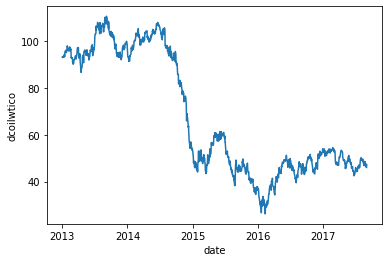

In [49]:
sns.lineplot(data = data_oil_2['dcoilwtico'].to_timestamp())

## Merge Oil Price with the transactions and stores dataframe

In [16]:
dataframe_merged_OilTransacStores = pd.merge(dataframe_merged, data_oil, on="date",how = "left")
pd.DataFrame(dataframe_merged_OilTransacStores)

,date,store_nbr,transactions,city,state,type,cluster,dcoilwtico
0,2013-01-01,25,770,Salinas,Santa Elena,D,1,NaN
1,2013-01-02,25,1038,Salinas,Santa Elena,D,1,93.14
2,2013-01-03,25,887,Salinas,Santa Elena,D,1,92.97
3,2013-01-04,25,1054,Salinas,Santa Elena,D,1,93.12
4,2013-01-05,25,1355,Salinas,Santa Elena,D,1,NaN
...,...,...,...,...,...,...,...,...
83483,2017-08-11,52,2957,Manta,Manabi,A,11,48.81
83484,2017-08-12,52,2804,Manta,Manabi,A,11,NaN
83485,2017-08-13,52,2433,Manta,Manabi,A,11,NaN
83486,2017-08-14,52,2074,Manta,Manabi,A,11,47.59


## Create a DataFrame to analyze days with NaN values

In [17]:
dataframe_NonOilValue = data_oil[data_oil["dcoilwtico"].isna()]
dataframe_NonOilValue

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


In [18]:
dataframe_NonOilValue.count()

date          43
dcoilwtico     0
dtype: int64

## Holidays Dataset

In [19]:
data_holidays = pd.read_csv("/Users/farahboukitab/code/mrdaraujo/business_case_869/business_case_869/data/store-sales-time-series-forecasting/holidays_events.csv")
pd.DataFrame(data_holidays)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [20]:
len(data_holidays)

350

In [21]:
data_holidays.nunique()

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

In [22]:
DataFrame_duplicate = pd.DataFrame(data_holidays['date'].value_counts()>1)
DataFrame_duplicate = DataFrame_duplicate.reset_index()
DataFrame_duplicate.rename(columns={'index': 'date', 'date': 'bool'}, inplace=True)
DataFrame_duplicate

,date,bool
0,2014-06-25,True
1,2017-06-25,True
2,2016-06-25,True
3,2015-06-25,True
4,2013-06-25,True
...,...,...
307,2014-07-13,False
308,2014-07-12,False
309,2014-07-09,False
310,2014-07-08,False


In [23]:
DataFrame_duplicate[DataFrame_duplicate['bool']==False].count()

date    281
bool    281
dtype: int64

In [24]:
DataFrame_duplicate[DataFrame_duplicate['bool']==True].count()

date    31
bool    31
dtype: int64

In [25]:
DataFrame_duplicate_2 = DataFrame_duplicate[DataFrame_duplicate['bool']==True]
DataFrame_duplicate_2

,date,bool
0,2014-06-25,True
1,2017-06-25,True
2,2016-06-25,True
3,2015-06-25,True
4,2013-06-25,True
5,2012-06-25,True
6,2014-12-26,True
7,2015-12-22,True
8,2012-12-22,True
9,2012-12-24,True


In [26]:
## select on data holidays only duplicate days

In [27]:
DataFrame_HolidaysDuplicate = pd.merge(DataFrame_duplicate_2, data_holidays, on="date")
DataFrame_HolidaysDuplicate

,date,bool,type,locale,locale_name,description,transferred
0,2014-06-25,True,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
1,2014-06-25,True,Holiday,Local,Machala,Fundacion de Machala,False
2,2014-06-25,True,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
3,2014-06-25,True,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Francia,False
4,2017-06-25,True,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
...,...,...,...,...,...,...,...
64,2016-05-08,True,Event,National,Ecuador,Dia de la Madre,False
65,2017-12-22,True,Holiday,Local,Salinas,Cantonizacion de Salinas,False
66,2017-12-22,True,Additional,National,Ecuador,Navidad-3,False
67,2015-07-03,True,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False


In [28]:
data_holidays.dtypes

date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object

In [29]:
data_holidays.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [32]:
data_holidays['date'].value_counts()

2014-06-25    4
2017-06-25    3
2016-06-25    3
2015-06-25    3
2013-06-25    3
             ..
2014-07-13    1
2014-07-12    1
2014-07-09    1
2014-07-08    1
2017-12-26    1
Name: date, Length: 312, dtype: int64

## Sample Submission Dataset

In [34]:
data_sample = pd.read_csv("/Users/farahboukitab/code/mrdaraujo/business_case_869/business_case_869/data/store-sales-time-series-forecasting/sample_submission.csv")
pd.DataFrame(data_sample)

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [ ]:
Merge train dataset

## Duplicates

In [36]:
#locate and remove meaningless duplicate

In [37]:
#Define how many duplicated rows

###duplicate_count = len(data)-len(data.drop_duplicates()) # Original data length minus data length without duplicates
###duplicate_count

#data.drop_duplicates(inplace=True) # Drop duplicates in place

## Missing Data

In [38]:
#percentage of missing values for all columns

In [39]:
###data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

In [40]:
#1 - Drop the column entirely
#2 - Replace the NaN with meaningful values
#3- Impute the column median using sklearn simple imputer

## Scaling

In [41]:
#investigate columns for distribution and outliers and choose the most appropriate scaling technique : Standard Scale
#Robust Scale, MinMax Scale